<h1>Regression Models</h1>

<b>Project description: </b> Energy efficiency data set consists of 8 different features (X1-X8) that are affecting building energy efficiency such as heating load (Y1) and cooling load (Y2). Y1 and Y2 represent required energy required to heat or cool the building. The goal of this study will be to use regression models to predict Y1 and Y2 in relationship to features X1- X8. <br>
Data set that will be used to solve this problem consists of 768 samples. <br>
The goal with regression models is to predict the output value(continuous).


This data set is used under Creative Commons Attribution 4.0 International licence. <br>
It is using <b>Energy Efficiency</b> data set from <b>UCI Machine Learning Repository</b><br>
The data set can be found at: <a href ="https://archive.ics.uci.edu/dataset/242/energy+efficiency">Energy Efficiency data set</a>

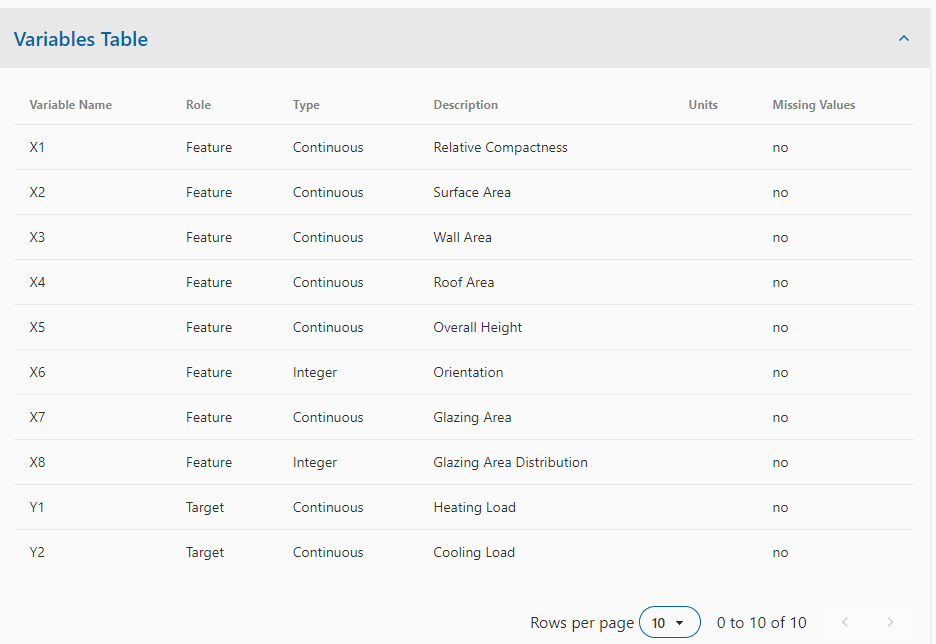 <br>
Source: Tsanas, A., & Xifara, A. (2012). Energy Efficiency Data Set. UCI Machine Learning Repository. Retrieved from https://archive.ics.uci.edu/ml/datasets/Energy+Efficiency

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from matplotlib.colors import LinearSegmentedColormap

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [3]:
#leading the excel file
df = pd.read_excel("ENB2012_data.xlsx")
#initializing list with colors i want to use
my_colors = ['#19647E', '#FFFFFF', '#FF6F61']

<h2>Data preparation</h2>

<h3>1. Perform exploratory data analysis (EDA) to understand the distribution of variables, identify outliers, and check for missing values.</h3>
<h3>2. Visualize the relationships between the independent variables and the target variable using appropriate plots.</h3>
<h3>3. If necessary, perform feature selection or transformation to enhance the quality of input variables.</h3>


In [4]:
#printing first top 5 rows
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
#renaming data culmns to get better understanding what they represent
df.rename(columns={'X1': 'Relative_Compactness'}, inplace=True)
df.rename(columns={'X2': 'Surface_Area'}, inplace=True)
df.rename(columns={'X3': 'Wall_Area'}, inplace=True)
df.rename(columns={'X4': 'Roof_Area'}, inplace=True)
df.rename(columns={'X5': 'Overall_Height'}, inplace=True)
df.rename(columns={'X6': 'Orientation'}, inplace=True)
df.rename(columns={'X7': 'Glazing_Area'}, inplace=True)
df.rename(columns={'X8': 'Glazing_Area_Distribution'}, inplace=True)
df.rename(columns={'Y1': 'Heating_Load'}, inplace=True)
df.rename(columns={'Y2': 'Cooling_Load'}, inplace=True)

In [6]:
#printing column names, non null count for each column and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
#describe gives us information about data set, such as number of entries, mean, max and min and quartiles
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


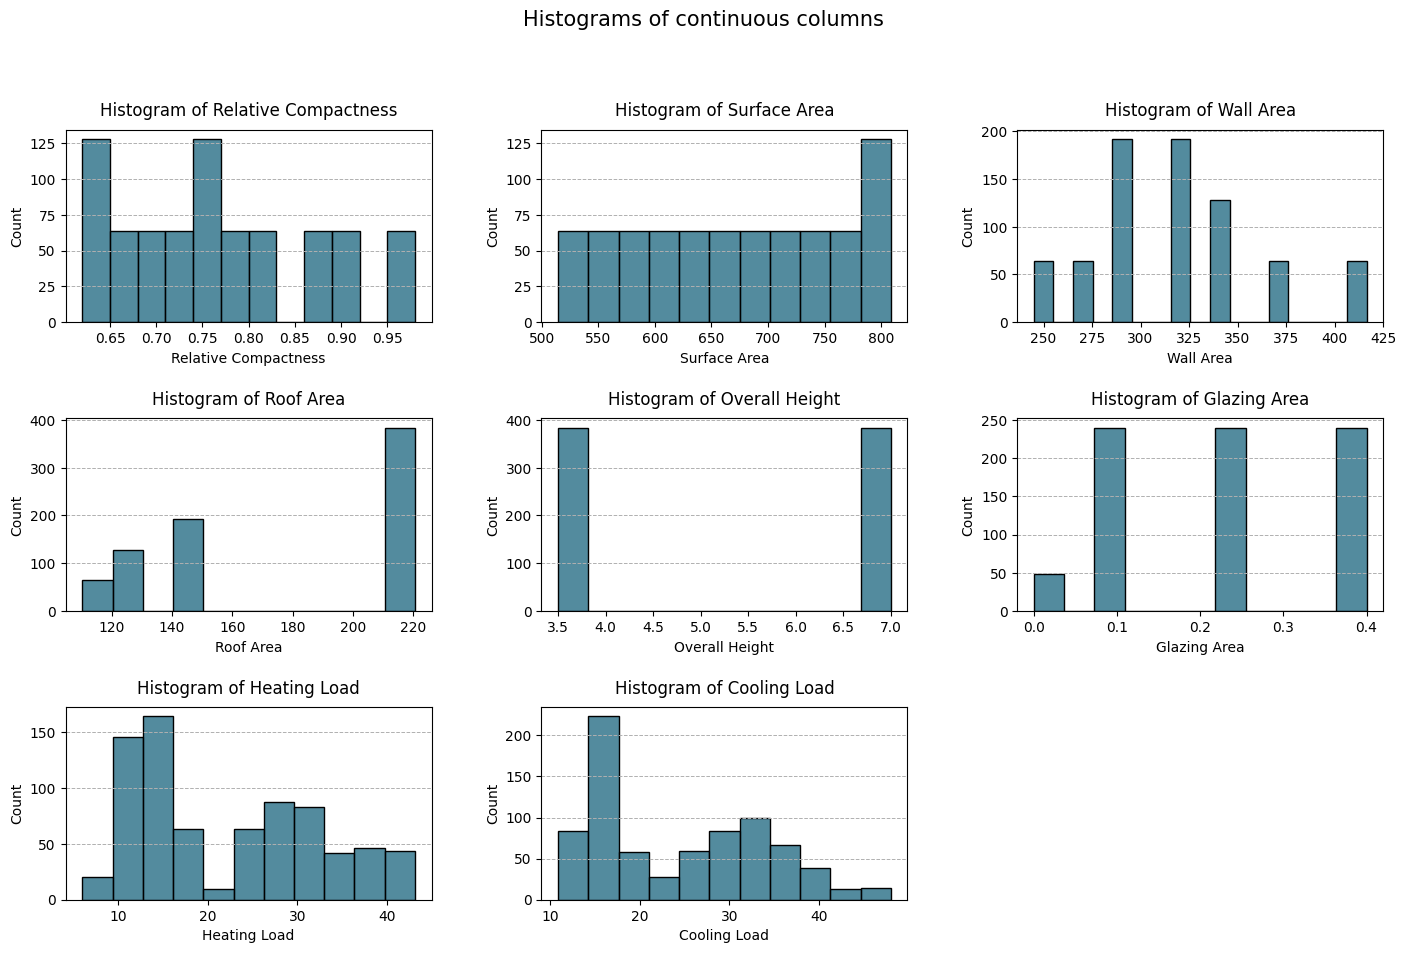

In [8]:
#plotting multiple plots (histograms) for continuous columns
figure, axs = plt.subplots(3, 3, figsize=(17, 10)) # initializing plot
axs = axs.flatten() #fllattening the plot

#columns that will be shown
continous_coulms = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area', 'Heating_Load', 'Cooling_Load']

#lloping through continuous columns and ploting them on a histogram
for i, col in enumerate(continous_coulms):
    sns.histplot(df[col], ax=axs[i], color=my_colors[0])
    axs[i].set_title("Histogram of " + col.replace("_", " "), pad=10)
    axs[i].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel(col.replace("_", " "))

plt.suptitle("Histograms of continuous columns", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
axs[8].set_visible(False)

In [9]:
#some columns look "suspicious"-they should be continuous but they seam to have only few different values
#printing their unique values for better understanding
print('Unique values for Wall Area are: ', df['Wall_Area'].unique())
print('Unique values for Roof Area are: ',df['Roof_Area'].unique())
print('Unique values for Overall Height are: ',df['Overall_Height'].unique())
print('Unique values for Glazing Area are: ',df['Glazing_Area'].unique())


Unique values for Wall Area are:  [294.  318.5 343.  416.5 245.  269.5 367.5]
Unique values for Roof Area are:  [110.25 122.5  147.   220.5 ]
Unique values for Overall Height are:  [7.  3.5]
Unique values for Glazing Area are:  [0.   0.1  0.25 0.4 ]


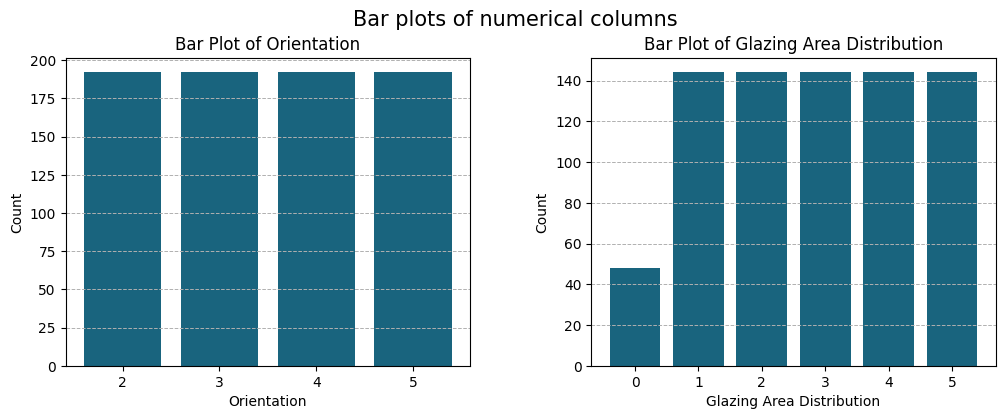

In [10]:
#simmilar as in the previous plots but this time showing numerican features on a bar plot
figure, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()

int_coulms = ['Orientation', 'Glazing_Area_Distribution']

for i, col in enumerate(int_coulms):
    axs[i].bar(df[col].value_counts().index, df[col].value_counts().values, color=my_colors[0])
    axs[i].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
    axs[i].set_xticks(df[col].value_counts().index) #to show 1,2,3... not 1.5, 2.0,2.5....
    axs[i].set_title(f"Bar Plot of {col.replace('_', ' ')}")
    axs[i].set_xlabel(col.replace('_', ' '))
    axs[i].set_ylabel('Count')

plt.suptitle("Bar plots of numerical columns", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


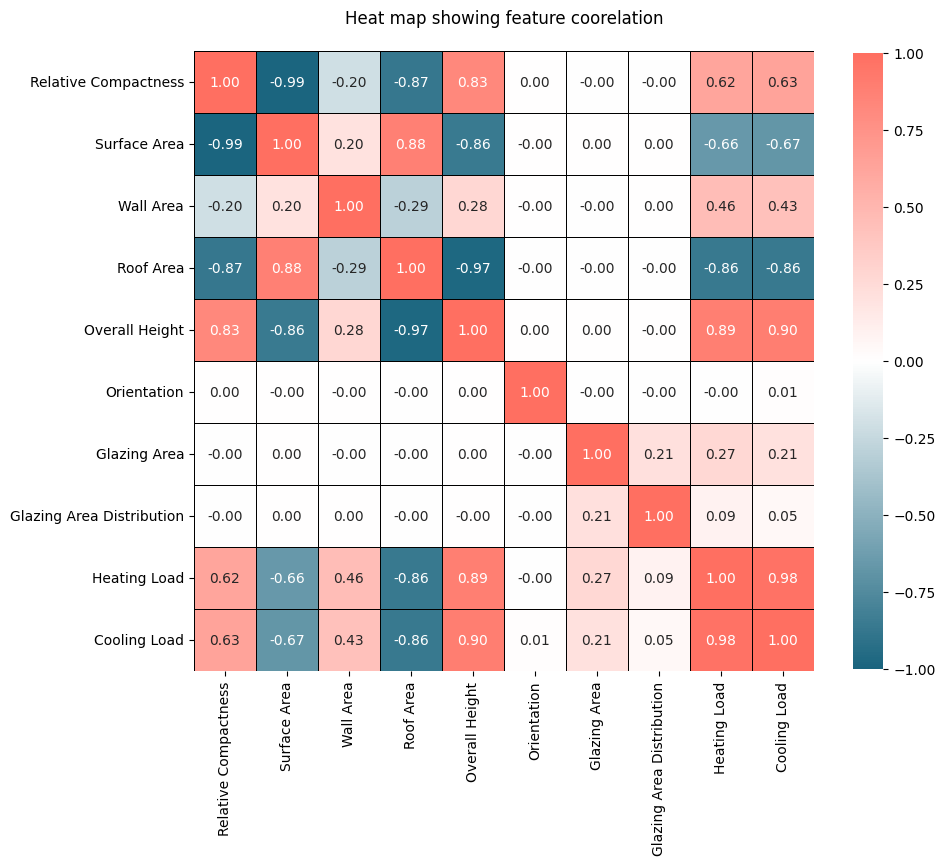

In [11]:
#showing features and their coorelation on a coorelation heat map
correlation_matrix = df.corr()
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", my_colors)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_cmap, square=True, cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

plt.title('Heat map showing feature coorelation', pad=20)
plt.xticks(ticks=np.arange(len(df.columns)) + 0.5, labels=df.columns.str.replace("_", " ")) 
plt.yticks(ticks=np.arange(len(df.columns)) + 0.5, labels=df.columns.str.replace("_", " ")) 

plt.show()

In [12]:
#droping columns that dont't have coorelation with other column or have very low coorelation
df = df.drop('Orientation', axis=1)
df = df.drop('Glazing_Area_Distribution', axis=1)

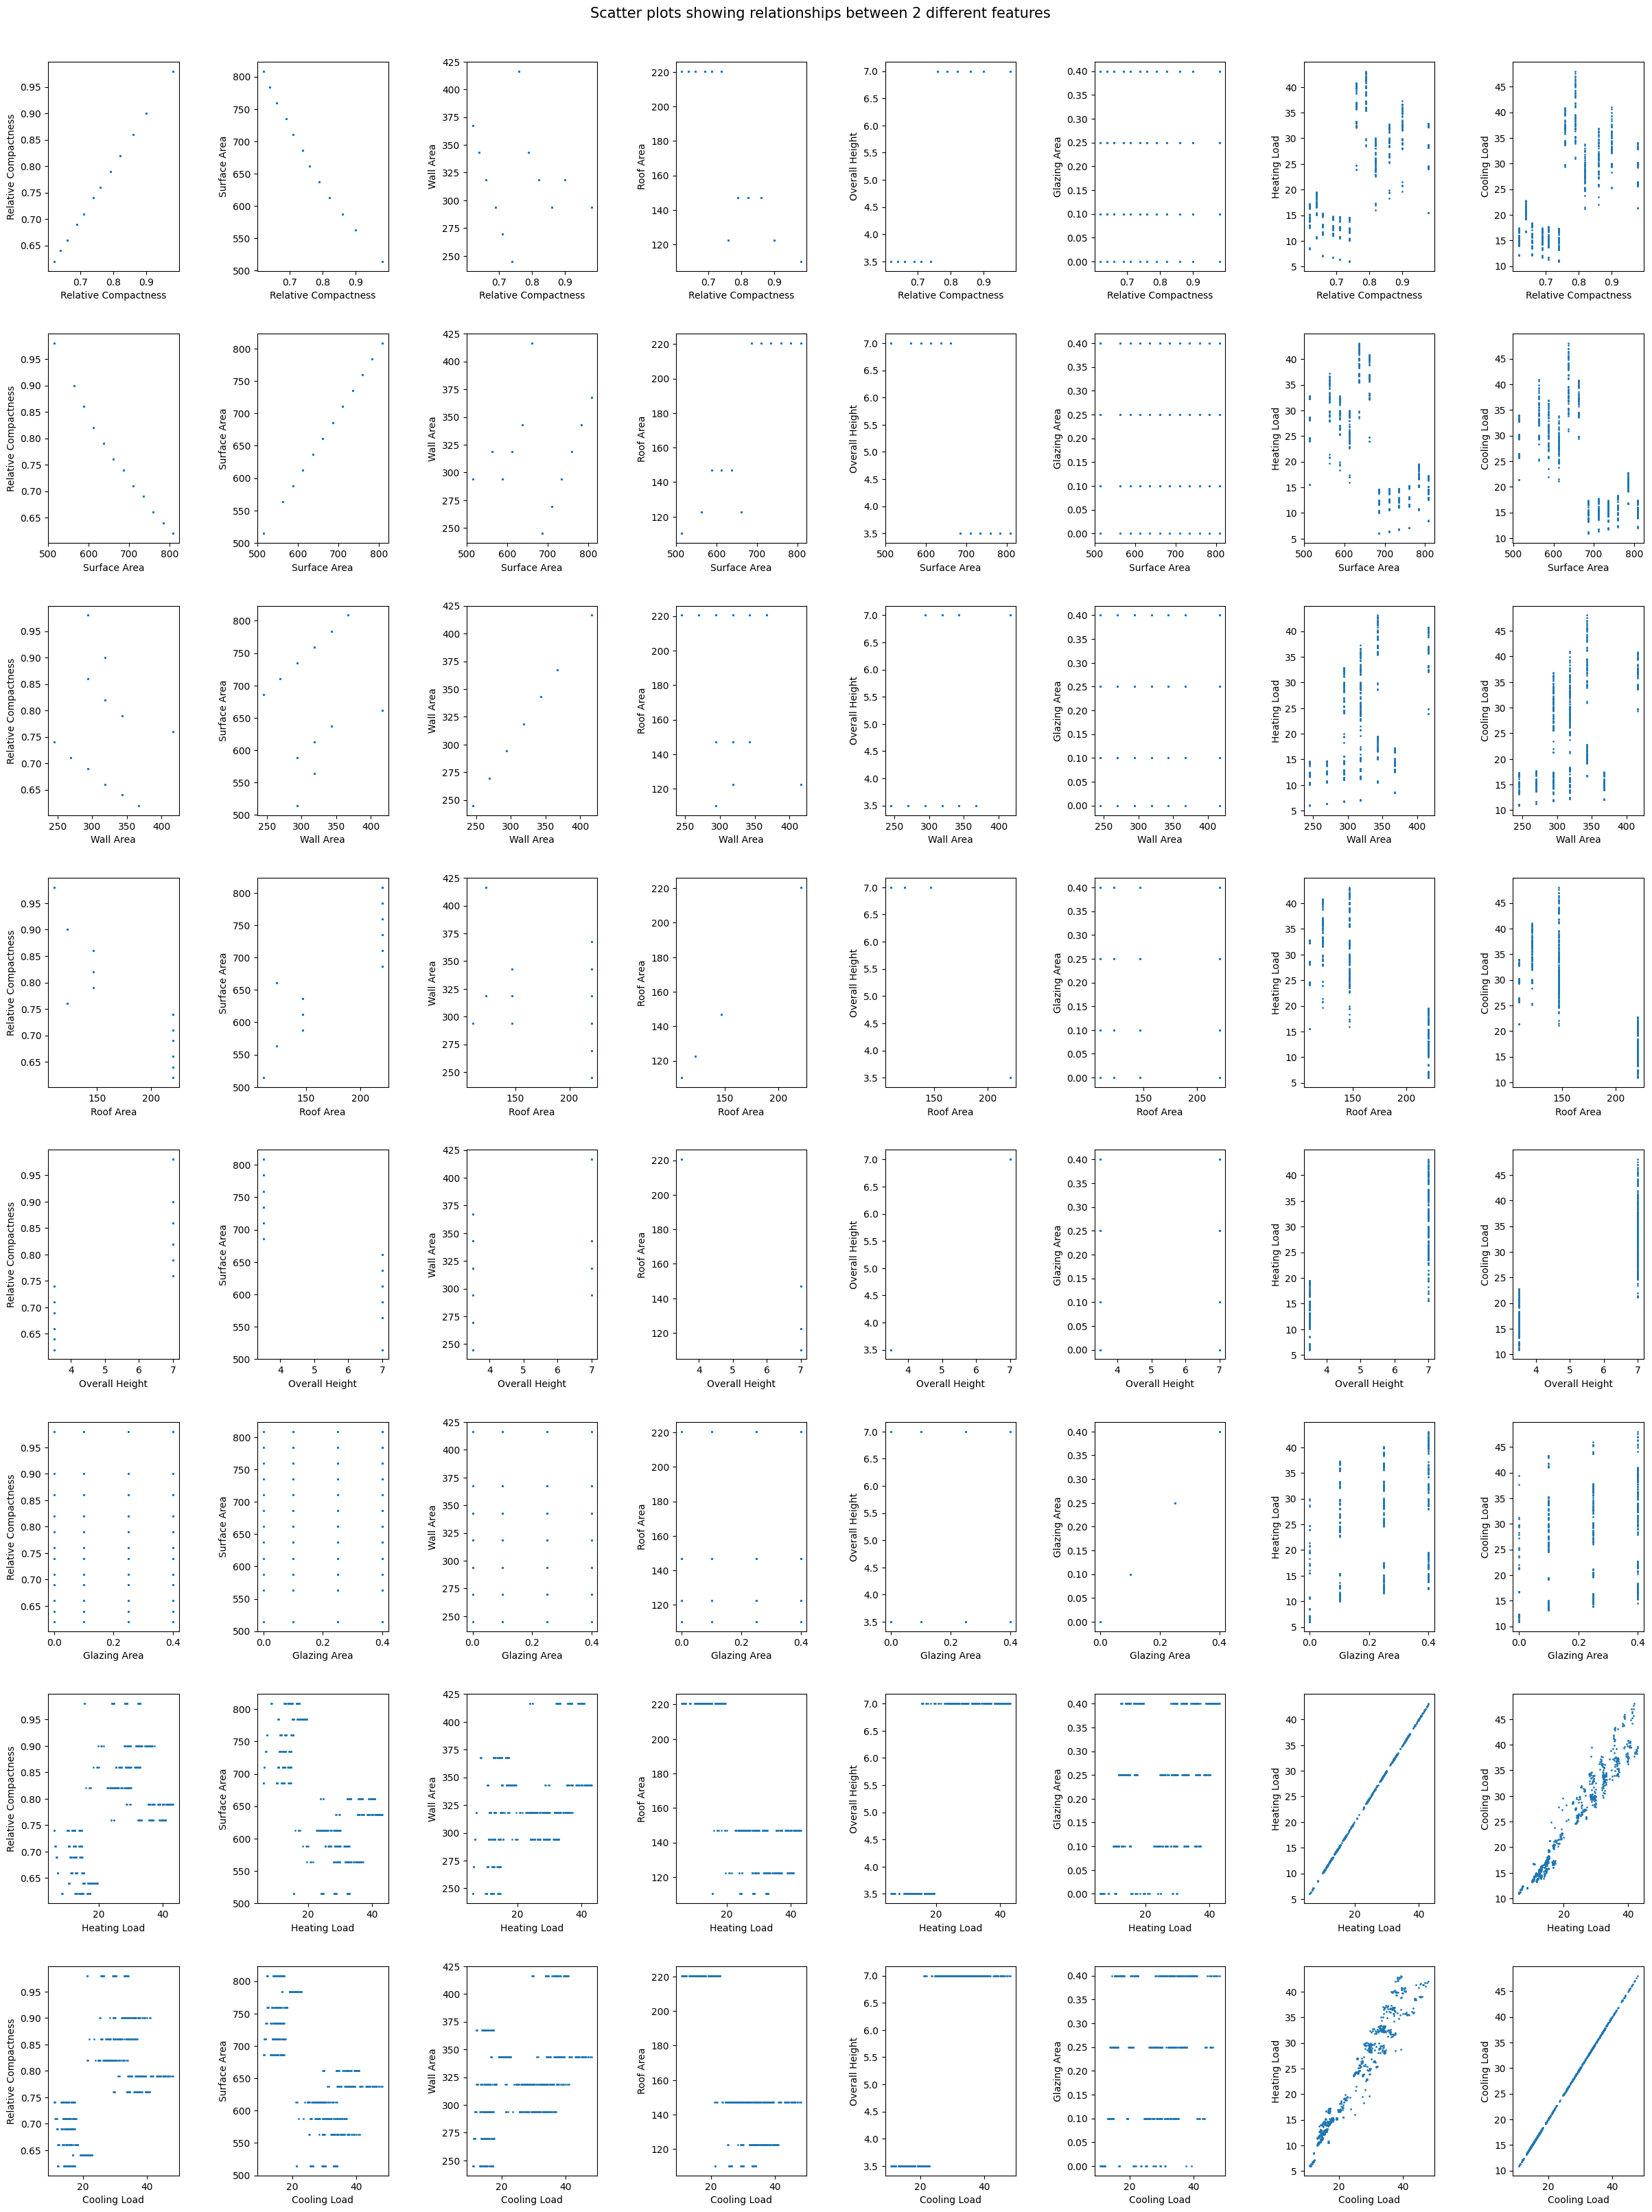

In [13]:
#showing scater plots of each feature in relation to every other feature
figure, axs = plt.subplots(8, 8, figsize=(30, 40))
axs = axs.flatten()

#double loop to show combaination of features
for i, col in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        axs[i*8 + j].scatter(df[col], df[col2], s=1)
        axs[i*8 + j].set_xlabel(col.replace("_", " "))
        axs[i*8 + j].set_ylabel(col2.replace("_", " "))

plt.suptitle("Scatter plots showing relationships between 2 different features", fontsize=15, y=0.9)
plt.subplots_adjust(hspace=0.3, wspace=0.6)
plt.show()

<h2>Summarization step 1</h2>

<p>In the first part, exploration was done. I concluded that there are no null values in the data set. Also, it was possible to see data types of the features and their statistical data, such as mean, max, quartiles. Data was shown on different types of plots that give us idea about data distribution, features and their relationships. Some features, despite being continuous have only 2 or 4 values. Some features have more influence on each other (conclusion made by looking at correlation chart) but some have very little or no influence, such as Orientation. That´s why I decided to remove this feature.</p>

<h2>Model selection and evaluation:<h2>

<h3>1. Select at least two regression models (e.g., linear regression, ridge regression, or lasso
regression) that align with the dataset's characteristics and the specific requirements
of the problem.</h3>
<h3>2. Train the selected regression models using the training dataset and assess their
performance on the testing dataset using appropriate evaluation metrics.</h3>
<h3>3. Based on your analysis, make recommendations or predictions for future
observations.</h3>

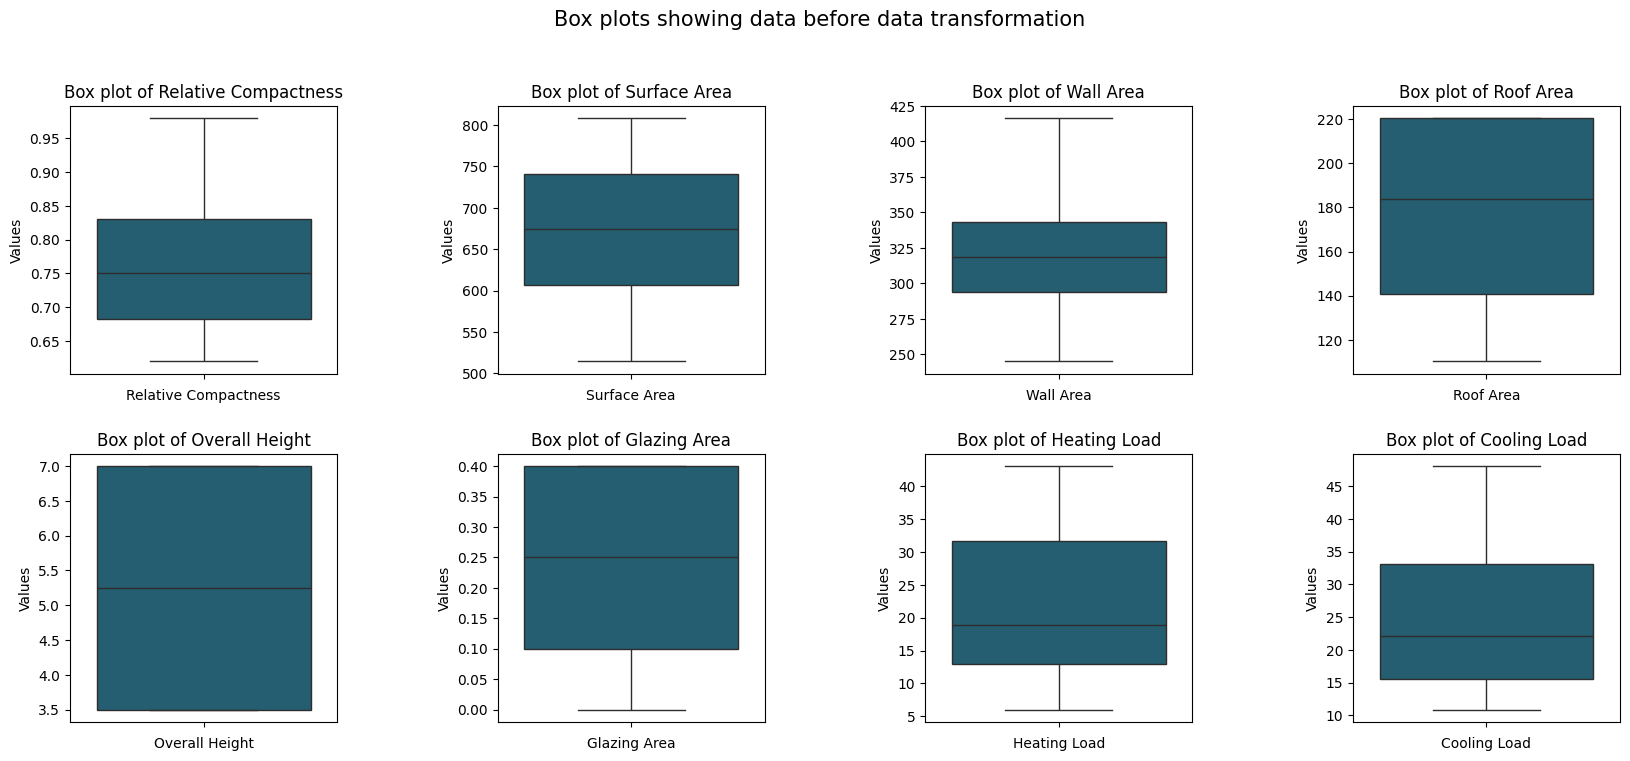

In [14]:
figure, axs = plt.subplots(2, 4, figsize=(20, 8))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(y=col, data=df, ax=axs[i], color=my_colors[0])
    axs[i].set_title(f"Box plot of {col.replace('_', ' ')}")
    axs[i].set_xlabel(col.replace('_', ' '))
    axs[i].set_ylabel("Values")
    axs[i].tick_params(axis='x', rotation=90)

plt.suptitle("Box plots showing data before data transformation", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.3, wspace=0.6)
plt.show()

In [15]:
x = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']] #features that will be used for prediction
y = df[['Heating_Load', 'Cooling_Load']] #features that will be predicted

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #spliting data into training and testing data, 0.2 means 20% testing 80% training

print('training sets:', x_train.shape , y_train.shape)
print('testing sets:', x_test.shape , y_test.shape)

training sets: (614, 6) (614, 2)
testing sets: (154, 6) (154, 2)


In [16]:
scaler = StandardScaler().fit(x_train) # it is preprocesing the data, it will use x_train data to fit the scaler by setinh mean to 0 and stand. dev. to 1; later it will be used to transform (scale) x_train and x_test data

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [1]:
figure, axs = plt.subplots(2, 4, figsize=(20, 8))
axs = axs.flatten()

for i, col in enumerate(x_train.columns):
    sns.boxplot(y=x_train_scaled[:, i], ax=axs[i], color=my_colors[0])
    axs[i].set_title(f"Box plot of {col.replace('_', ' ')}")
    axs[i].set_xlabel(col.replace('_', ' '))
    axs[i].set_ylabel("Values")
    axs[i].tick_params(axis='x', rotation=90)

plt.suptitle("Box plots showing data after data transformation", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.3, wspace=0.6)
plt.show()

NameError: name 'plt' is not defined